# Kruskal's Algorithm

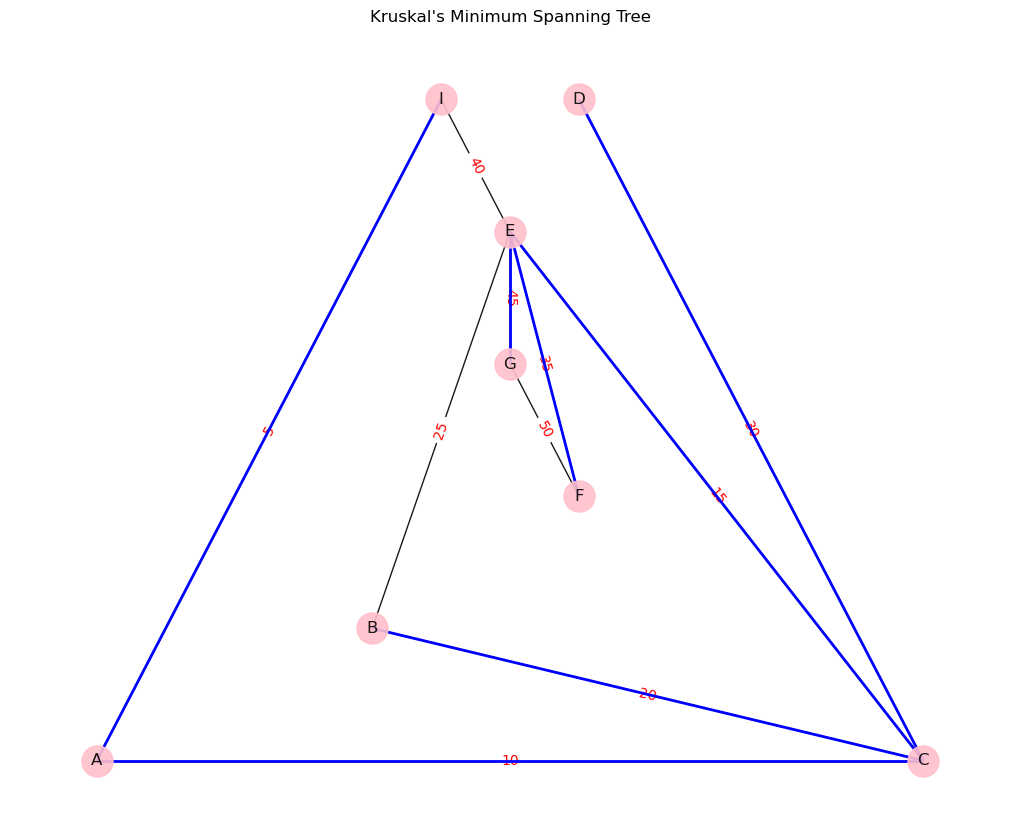

Edges in the MST: [('A', 'I', 5), ('A', 'C', 10), ('C', 'E', 15), ('B', 'C', 20), ('C', 'D', 30), ('E', 'F', 35), ('E', 'G', 45)]


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.utils import UnionFind

# Initialize the graph
seed = 55
G = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G","I"])

# Add edges with weights
edges_with_weights = [
    ("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
    ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
    ("F", "G", 50), ("G", "E", 45)
]
G.add_weighted_edges_from(edges_with_weights)

# Kruskal's algorithm
def kruskal_mst(graph):
    # Sort edges by weight
    edges = sorted(graph.edges(data=True), key=lambda t: t[2].get('weight', 1))
    uf = UnionFind()
    mst = []
    for u, v, data in edges:
        if uf[u] != uf[v]:
            mst.append((u, v, data['weight']))
            uf.union(u, v)
    return mst

# Get the MST
mst_edges = kruskal_mst(G)

# Visualize the graph with MST highlighted
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw original graph
nx.draw(G, pos, with_labels=True, node_color='pink', node_size=500, edge_color='black', width=1, alpha=0.9)

# Draw edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Highlight the edges in the MST
mst_edges_tuple = [(u, v) for u, v, weight in mst_edges]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges_tuple, edge_color='blue', width=2)

plt.title("Kruskal's Minimum Spanning Tree")
plt.show()

# Print the edges in the MST
print("Edges in the MST:", mst_edges)

# Prim's Algorithm

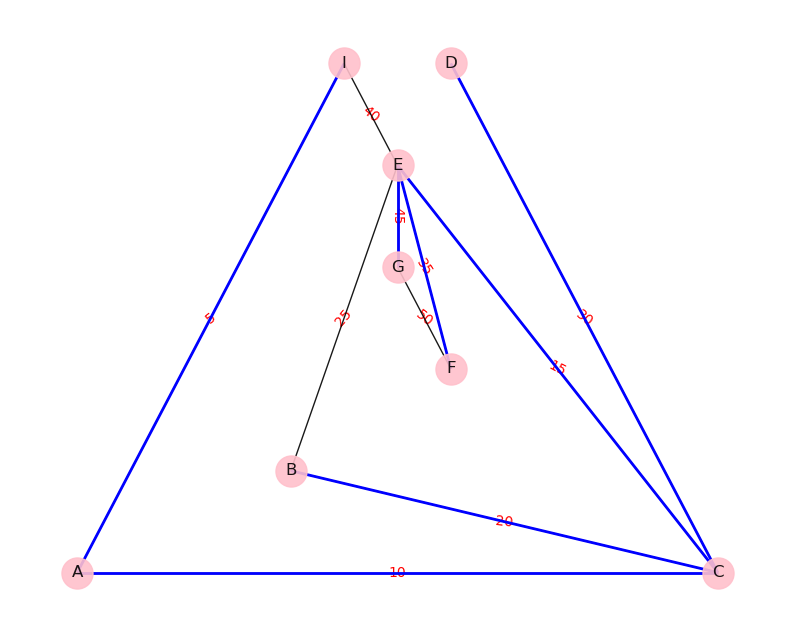

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Define Prim's algorithm function
def prim_algorithm(G, start_node):
    # Initialize empty set to keep track of visited nodes
    visited = set()
    # Initialize empty list to store the edges of the MST
    mst = []
    
    # Add the start node to the visited set
    visited.add(start_node)
    
    # Continue until all nodes are visited
    while len(visited) < len(G.nodes):
        # Initialize minimum edge and its weight
        min_edge = None
        min_weight = float('inf')
        
        # Iterate through each visited node
        for node in visited:
            # Find the neighboring nodes that are not visited yet
            neighbors = set(G.neighbors(node)) - visited
            # Iterate through neighboring nodes
            for neighbor in neighbors:
                # Check if the edge weight is less than the current minimum weight
                if G[node][neighbor]['weight'] < min_weight:
                    min_weight = G[node][neighbor]['weight']
                    min_edge = (node, neighbor)
        
        # Add the minimum edge to the MST
        mst.append(min_edge)
        # Add the new node to the visited set
        visited.add(min_edge[1])
    
    return mst

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C", {'weight': 10}), ("A","I", {'weight': 5}), ("C","B", {'weight': 20}), 
            ("C","E", {'weight': 15}), ("C","D", {'weight': 30}), ("B","E", {'weight': 25}), 
            ("I","E", {'weight': 40}), ("E","F", {'weight': 35}), ("F","G", {'weight': 50}), 
            ("G","E", {'weight': 45})]
G.add_edges_from(edgelist)

# Get the MST using Prim's algorithm starting from node 'A'
mst = prim_algorithm(G, 'A')

# Plot the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9, width=1, edge_color='black', linewidths=1)

# Highlight the edges of the MST
nx.draw_networkx_edges(G, pos, edgelist=mst, width=2, edge_color='blue')

plt.show()

# Djitraka's Shortest Path Algorithm

Shortest path from node 'A' to 'G': ['A', 'C', 'E', 'G']


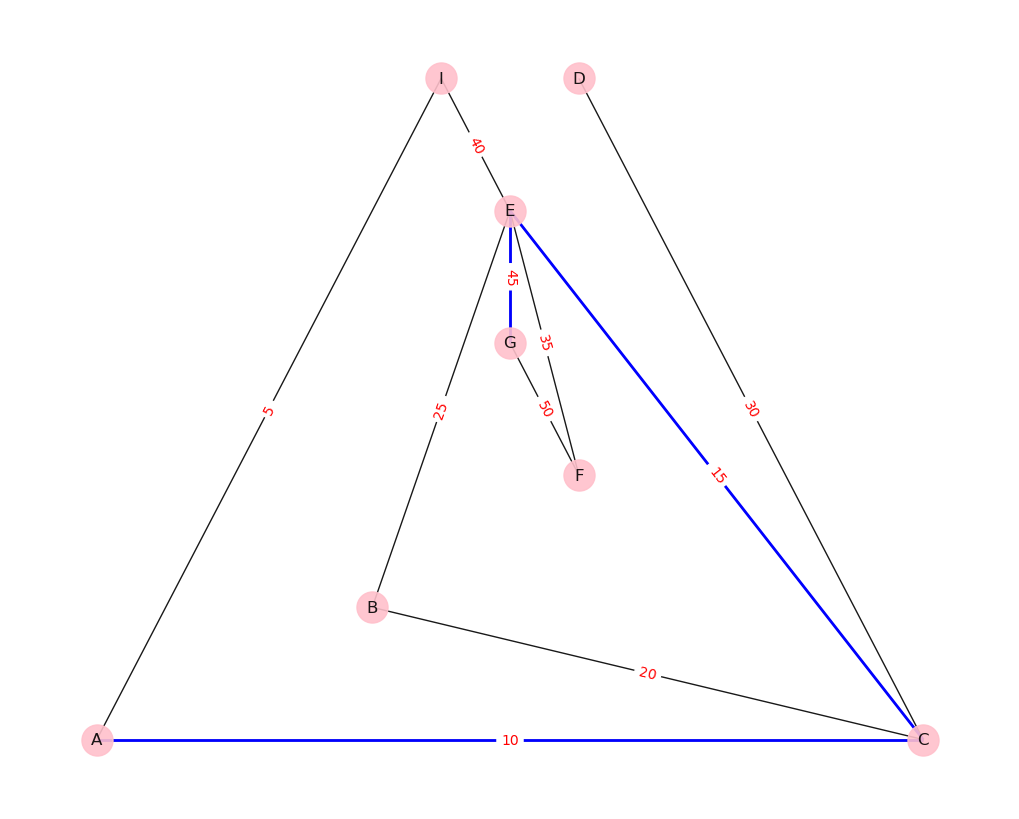

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Define Dijkstra's algorithm function
def dijkstra_shortest_path(G, start_node):
    # Initialize distances dictionary to store the shortest distance from the start_node to each node
    distances = {node: float('inf') for node in G.nodes}
    distances[start_node] = 0
    
    # Initialize priority queue (heap) to store nodes with their tentative distances
    pq = [(0, start_node)]
    
    # Initialize dictionary to keep track of visited nodes
    visited = {}
    
    # Initialize dictionary to store predecessor nodes for each node
    predecessors = {}
    
    # Continue until the priority queue is empty
    while pq:
        # Pop the node with the smallest tentative distance
        current_dist, current_node = heapq.heappop(pq)
        
        # Check if the node has already been visited
        if current_node in visited:
            continue
        
        # Mark the node as visited
        visited[current_node] = True
        
        # Update the distances to the neighbors of the current node
        for neighbor in G.neighbors(current_node):
            if neighbor not in visited:
                # Calculate the new distance from the start_node to the neighbor through the current node
                new_distance = current_dist + G[current_node][neighbor]['weight']
                
                # Update the distance if the new distance is smaller
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = current_node
                    # Add the neighbor to the priority queue with its updated distance
                    heapq.heappush(pq, (new_distance, neighbor))
    
    return distances, predecessors

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C", {'weight': 10}), ("A","I", {'weight': 5}), ("C","B", {'weight': 20}), 
            ("C","E", {'weight': 15}), ("C","D", {'weight': 30}), ("B","E", {'weight': 25}), 
            ("I","E", {'weight': 40}), ("E","F", {'weight': 35}), ("F","G", {'weight': 50}), 
            ("G","E", {'weight': 45})]
G.add_edges_from(edgelist)

# Get the shortest distances and predecessors from node 'A' using Dijkstra's algorithm
shortest_distances, predecessors = dijkstra_shortest_path(G, 'A')

# Get the shortest path from node 'A' to 'G'
target_node = 'G'
shortest_path = [target_node]
while target_node != 'A':
    target_node = predecessors[target_node]
    shortest_path.append(target_node)
shortest_path.reverse()

print("Shortest path from node 'A' to 'G':", shortest_path)

# Plot the original graph
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw the graph nodes and edges
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9, width=1, edge_color='black', linewidths=1)

# Highlight the edges of the shortest path
for i in range(len(shortest_path) - 1):
    u = shortest_path[i]
    v = shortest_path[i + 1]
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color='blue')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

plt.show()